# Urban Cycling Dynamics: A Comprehensive Analysis of Bike Counts in Germany — Part 1

## First City: Munich

In [109]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter, MultipleLocator
import numpy as np
import seaborn as sns

muc_2015 = "./munich2015.csv"
muc_2016 = "./munich2016.csv"
muc_2017 = "./munich2017.csv"
muc_2018 = "./munich2018.csv"
muc_2019 = "./munich2019.csv"
muc_2020 = "./munich2020.csv"
muc_2021 = "./munich2021.csv"
muc_2022 = "./munich2022.csv"

df_muc_2015 = pd.read_csv(muc_2015)
df_muc_2016 = pd.read_csv(muc_2016)
df_muc_2017 = pd.read_csv(muc_2017)
df_muc_2018 = pd.read_csv(muc_2018)
df_muc_2019 = pd.read_csv(muc_2019)
df_muc_2020 = pd.read_csv(muc_2020)
df_muc_2021 = pd.read_csv(muc_2021)
df_muc_2022 = pd.read_csv(muc_2022)

df_munich = pd.concat([df_muc_2015,df_muc_2016,df_muc_2017,df_muc_2018,df_muc_2019,df_muc_2020,df_muc_2021,df_muc_2022], ignore_index=True)

# Since all the values of the column Uhrzeit start and end are always the same, they are not really needed for the analysis, we then will drop these columns
# List of columns to drop
columns_to_drop = ['uhrzeit_start', 'uhrzeit_ende', 'kommentar']

# Drop the specified columns
df_munich = df_munich.drop(columns=columns_to_drop)
df_munich = df_munich.sort_values(by='datum')
# df_munich.info()
# df_munich.to_csv('munich_bikes.csv', index=False)
df_munich['datum'] = pd.to_datetime(df_munich['datum'])

# Get list of unique locations names
unique_locations = df_munich['zaehlstelle'].unique()
print(unique_locations)

['Arnulf' 'Olympia' 'Hirsch' 'Kreuther' 'Margareten' 'Erhardt']


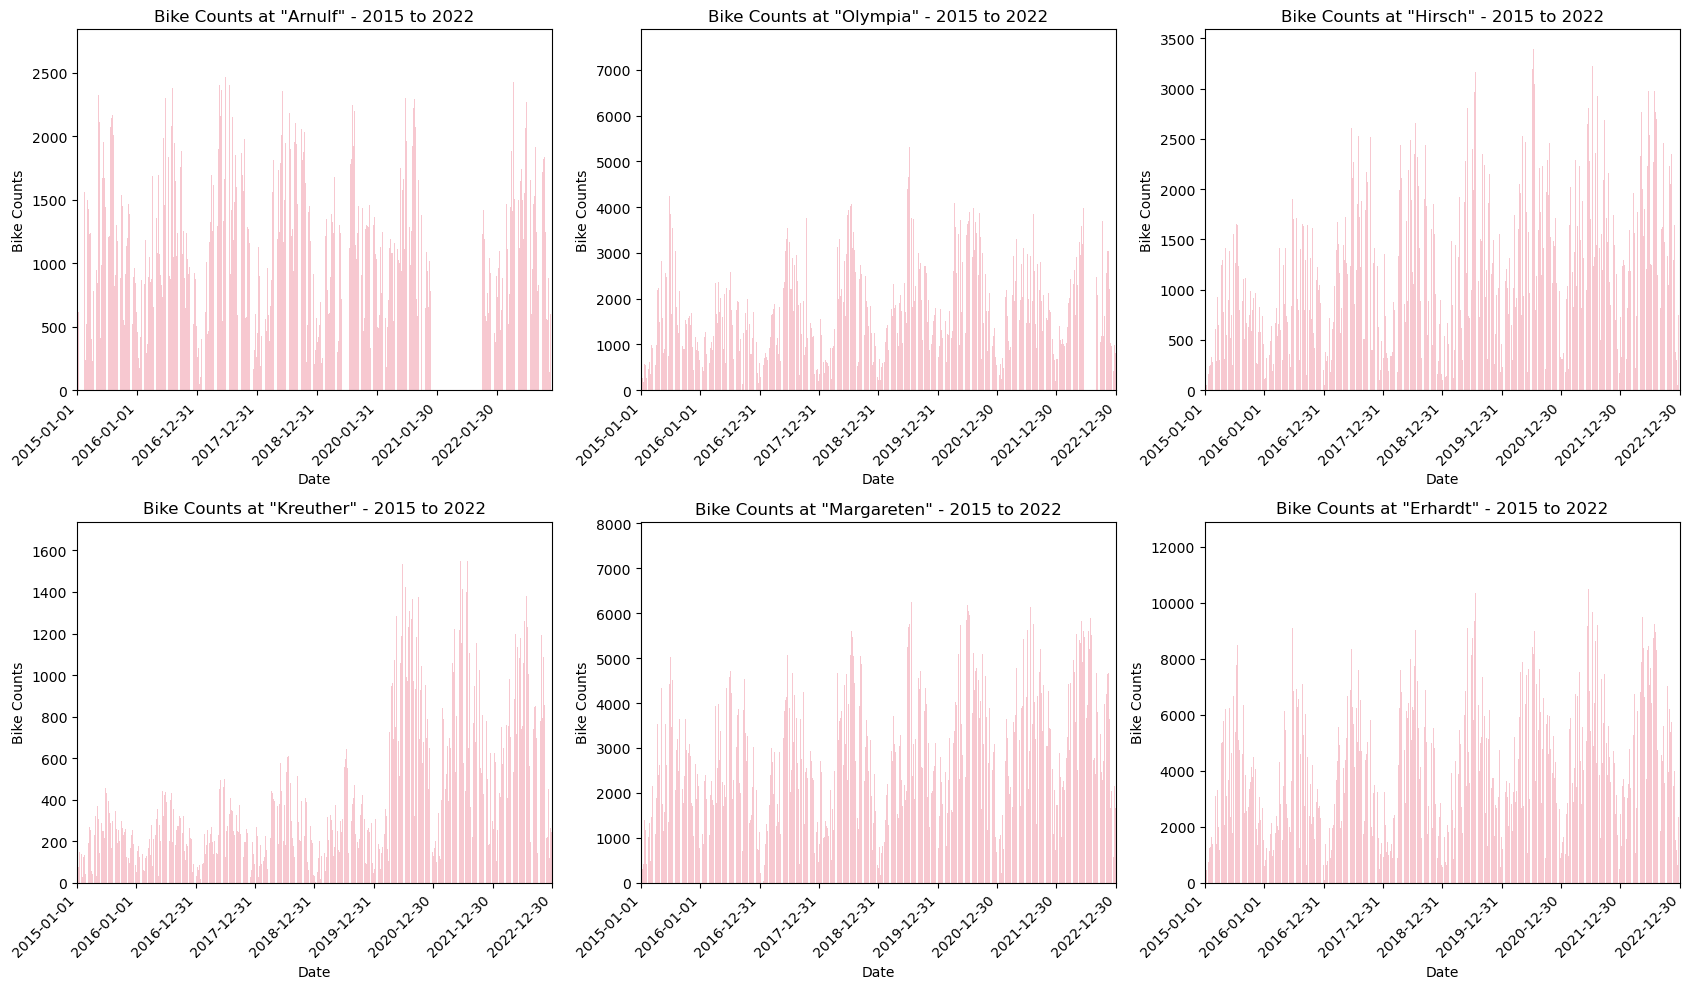

In [110]:
# Create a figure and six subplots
fig, axs = plt.subplots(2, 3, figsize=(17, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each unique location
for i, location in enumerate(unique_locations):
    # Filter the DataFrame for the current location
    df_location = df_munich[df_munich['zaehlstelle'] == location]

    # Plotting
    # Set the current subplot
    plt.sca(axs[i])

    # Plot bike counts as a bar plot in grey color
    sns.barplot(data=df_location, x=df_location['datum'].dt.date, y='gesamt', color='pink')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    # Adjust layout to prevent overlap
    plt.gca().xaxis.set_major_locator(MultipleLocator(365))

    # Add title and labels
    plt.title(f'Bike Counts at "{location}" - 2015 to 2022')
    plt.xlabel('Date')
    plt.ylabel('Bike Counts')


plt.tight_layout()

# Show plot
plt.show()


In [118]:
df_location_erhardt = df_munich[df_munich['zaehlstelle']=='Erhardt'].reset_index()
df_location_erhardt = df_location_erhardt[['datum','zaehlstelle','gesamt','min.temp','max.temp','niederschlag']]

df_location_kreuther = df_munich[df_munich['zaehlstelle']=='Kreuther'].reset_index()
df_location_kreuther = df_location_kreuther[['datum','zaehlstelle','gesamt','min.temp','max.temp','niederschlag']]

df_location_Hirsch = df_munich[df_munich['zaehlstelle']=='Hirsch'].reset_index()
df_location_Hirsch = df_location_Hirsch[['datum','zaehlstelle','gesamt','min.temp','max.temp','niederschlag']]

df_location_Olympia = df_munich[df_munich['zaehlstelle']=='Olympia'].reset_index()
df_location_Olympia = df_location_Olympia[['datum','zaehlstelle','gesamt','min.temp','max.temp','niederschlag']]

df_location_Margareten = df_munich[df_munich['zaehlstelle']=='Margareten'].reset_index()
df_location_Margareten = df_location_Margareten[['datum','zaehlstelle','gesamt','min.temp','max.temp','niederschlag']]

df_location_Arnulf = df_munich[df_munich['zaehlstelle']=='Arnulf'].reset_index()
df_location_Arnulf = df_location_Arnulf[['datum','zaehlstelle','gesamt','min.temp','max.temp','niederschlag']]

print(df_location_erhardt)

          datum zaehlstelle  gesamt  min.temp  max.temp  niederschlag
0    2015-01-01     Erhardt   137.0     -10.0       1.0           0.0
1    2015-01-02     Erhardt   281.0     -11.8       3.9           5.6
2    2015-01-03     Erhardt   269.0       0.2       4.2          26.4
3    2015-01-04     Erhardt   375.0       0.7       2.3           0.0
4    2015-01-05     Erhardt   976.0      -2.4       4.0           0.0
...         ...         ...     ...       ...       ...           ...
2917 2022-12-27     Erhardt  1507.0       1.2       7.0           0.0
2918 2022-12-28     Erhardt  1789.0       0.6       9.5           0.0
2919 2022-12-29     Erhardt  2093.0       5.1      13.5           1.2
2920 2022-12-30     Erhardt  2111.0       4.3      12.7           1.5
2921 2022-12-31     Erhardt  1868.0      10.5      20.0           0.0

[2922 rows x 6 columns]


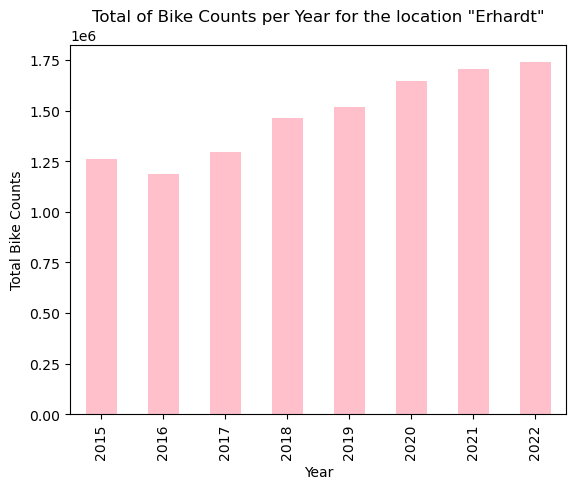

In [81]:
# Yearly aggregation
yearly_data = df_location_erhardt.groupby(df_location_erhardt['datum'].dt.year)['gesamt'].sum()
yearly_data.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='pink', title='Total of Bike Counts per Year for the location "Erhardt"')
plt.show()

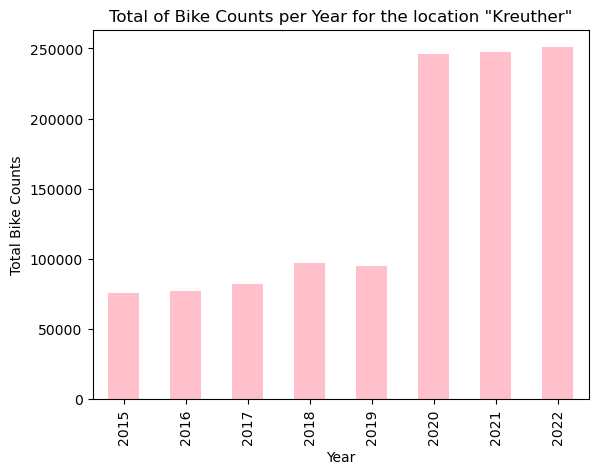

In [83]:
# Yearly aggregation
yearly_data = df_location_kreuther.groupby(df_location_kreuther['datum'].dt.year)['gesamt'].sum()
yearly_data.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='pink', title='Total of Bike Counts per Year for the location "Kreuther"')
plt.show()

In [72]:
# # Convert 'datum' column to datetime
# df_munich['datum'] = pd.to_datetime(df_munich['datum'])

# # Create a figure with two subplots for temperature
# fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# # Plot min temperature
# sns.lineplot(data=df_munich, x='datum', y='min.temp', ax=axs[0], color='blue')
# axs[0].set_title('Min Temperature')
# axs[0].set_xlabel('Date')
# axs[0].set_ylabel('Temperature (°C)')

# # Plot max temperature
# sns.lineplot(data=df_munich, x='datum', y='max.temp', ax=axs[1], color='red')
# axs[1].set_title('Max Temperature')
# axs[1].set_xlabel('Date')
# axs[1].set_ylabel('Temperature (°C)')

# # Adjust layout
# plt.tight_layout()

# # Show plot
# plt.show()


/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

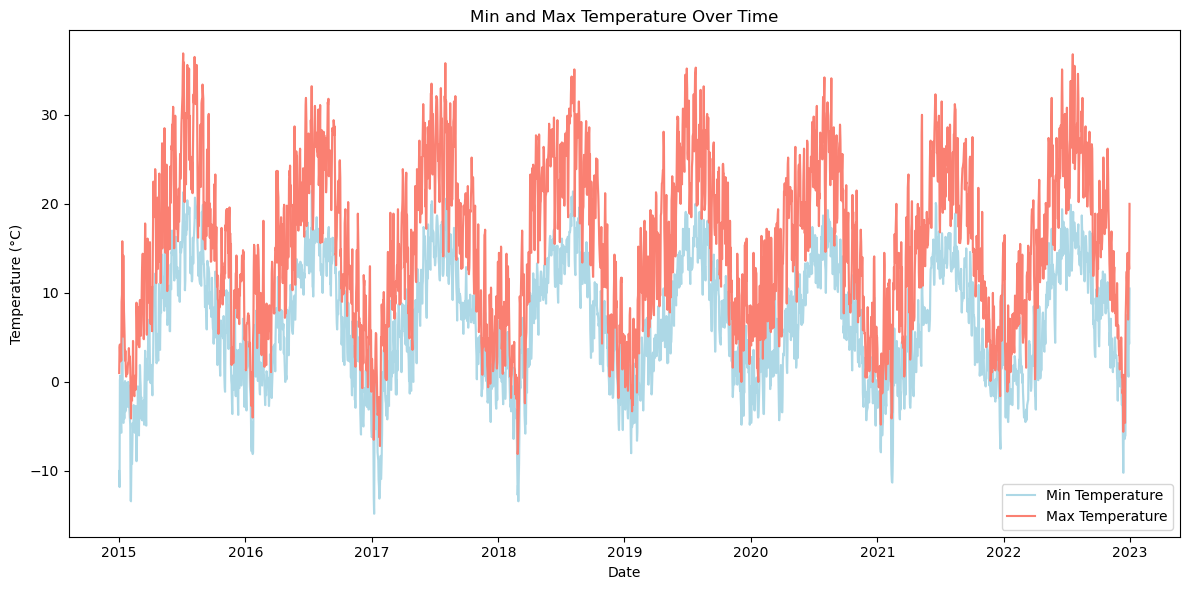

In [46]:
# Convert 'datum' column to datetime
df_munich['datum'] = pd.to_datetime(df_munich['datum'])

# Create a figure for temperature plot
plt.figure(figsize=(12, 6))

# Plot min temperature
sns.lineplot(data=df_munich, x='datum', y='min.temp', color='lightblue', label='Min Temperature')

# Plot max temperature
sns.lineplot(data=df_munich, x='datum', y='max.temp', color='salmon', label='Max Temperature')

# Set title and labels
plt.title('Min and Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Show legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


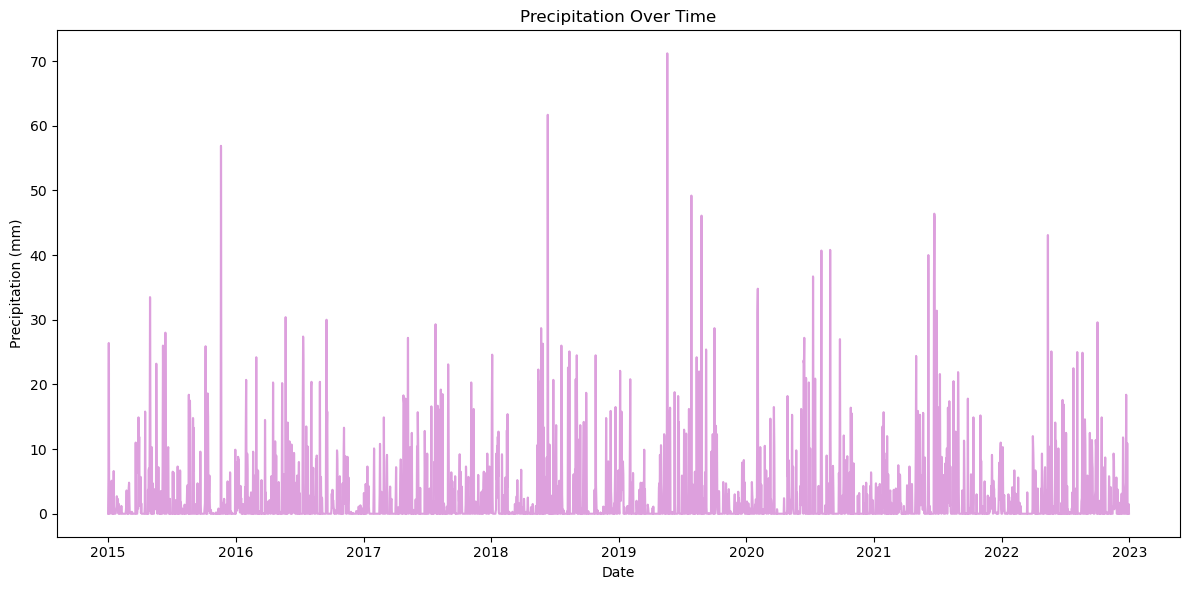

In [47]:
# Convert 'datum' column to datetime
df_munich['datum'] = pd.to_datetime(df_munich['datum'])

# Create a figure for precipitation plot
plt.figure(figsize=(12, 6))

# Plot precipitation
sns.lineplot(data=df_munich, x='datum', y='niederschlag', color='plum')

# Set title and labels
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')

# Show plot
plt.tight_layout()
plt.show()


In [64]:
# Calculate average temperature
df_munich['avg.temp'] = (df_munich['min.temp'] + df_munich['max.temp']) / 2
print(df_munich)

           datum zaehlstelle  richtung_1  richtung_2  gesamt  min.temp  \
0     2015-01-01      Arnulf         0.0         0.0     0.0     -10.0   
1825  2015-01-01     Olympia         9.0        25.0    34.0     -10.0   
730   2015-01-01      Hirsch         2.0         5.0     7.0     -10.0   
1095  2015-01-01    Kreuther         1.0         2.0     3.0     -10.0   
1460  2015-01-01  Margareten        32.0        40.0    72.0     -10.0   
...          ...         ...         ...         ...     ...       ...   
16770 2022-12-31    Kreuther       149.0       124.0   273.0      10.5   
17135 2022-12-31  Margareten       793.0       774.0  1567.0      10.5   
16405 2022-12-31      Hirsch       240.0       285.0   525.0      10.5   
15675 2022-12-31      Arnulf       424.0        27.0   451.0      10.5   
17500 2022-12-31     Olympia       609.0       493.0  1102.0      10.5   

       max.temp  niederschlag  bewoelkung  sonnenstunden  avg.temp  
0           1.0           0.0          81 

/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

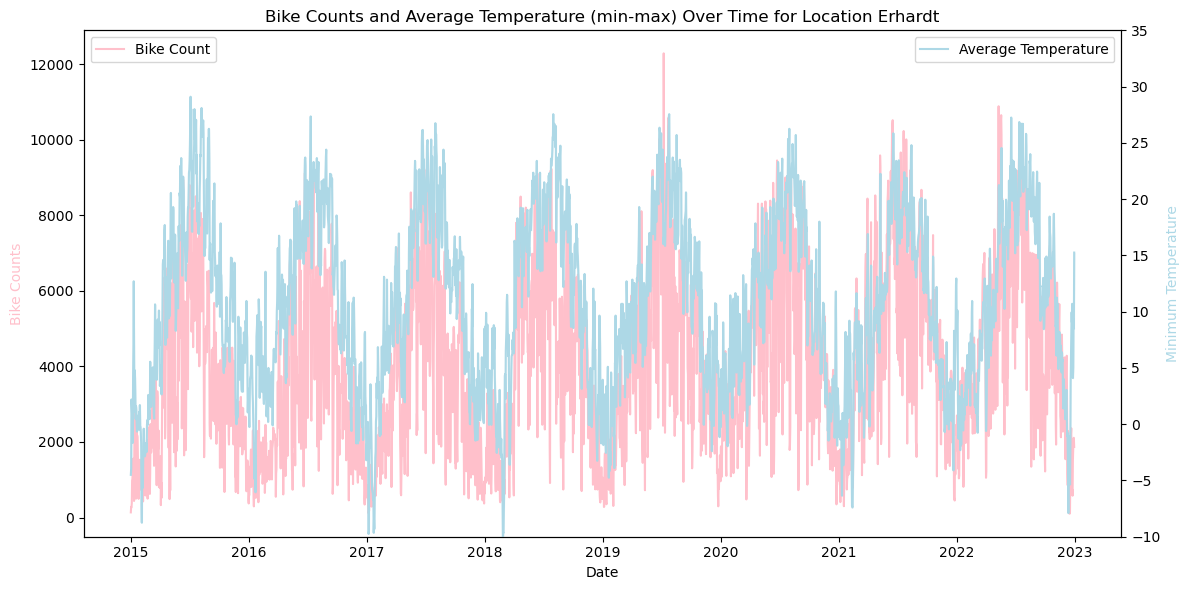

In [63]:
# Convert 'datum' column to datetime
df_munich['datum'] = pd.to_datetime(df_munich['datum'])

# Create a figure with one subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bike counts for 'Erhardt' on the primary y-axis
sns.lineplot(data=df_munich[df_munich['zaehlstelle'] == 'Erhardt'], x='datum', y='gesamt', color='pink', ax=ax1, label= 'Bike Count')
ax1.set_ylabel('Bike Counts', color='pink')

# Create a secondary y-axis for precipitation
ax2 = ax1.twinx()
sns.lineplot(data=df_munich, x='datum', y='avg.temp', color='lightblue', label='Average Temperature')
ax2.set_ylabel('Minimum Temperature', color='lightblue')
# Set y-axis limits for the temperature plot
ax2.set_ylim(-10, 35)

# Set title and labels
plt.title('Bike Counts and Average Temperature (min-max) Over Time for Location Erhardt')
ax1.set_xlabel('Date')



# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# Show plot
plt.tight_layout()
plt.show()


In [107]:
# Calculate average temperature
df_location_erhardt['avg.temp'] = (df_location_erhardt['min.temp'] + df_location_erhardt['max.temp']) / 2

df_location_erhardt.info() # There are no nulls at all in this dataset

correlation_coef = df_location_erhardt['gesamt'].corr(df_location_erhardt['avg.temp'])
print("The correlation coefficient is: ", correlation_coef)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   zaehlstelle   2922 non-null   object 
 1   gesamt        2922 non-null   float64
 2   min.temp      2922 non-null   float64
 3   max.temp      2922 non-null   float64
 4   niederschlag  2922 non-null   float64
 5   avg.temp      2922 non-null   float64
dtypes: float64(5), object(1)
memory usage: 137.1+ KB
The correlation coefficient is:  0.749764372851008


In [117]:
# Calculate average temperature
df_location_kreuther['avg.temp'] = (df_location_kreuther['min.temp'] + df_location_kreuther['max.temp']) / 2

# Filter the DataFrame to include only rows with dates from 01.01.2015 until 31.03.2020
df_location_kreuther_before = df_location_kreuther[df_location_kreuther['datum'] <= '2020-03-31']

# Filter the DataFrame to include only rows with dates from 31.03.2020 until the latest one
df_location_kreuther_after = df_location_kreuther[df_location_kreuther['datum'] > '2020-03-31']

correlation_coef_k = df_location_kreuther['gesamt'].corr(df_location_kreuther['avg.temp'])
print("The overall correlation coefficient is: ", correlation_coef_k)

corr_coef_k_before = df_location_kreuther_before['gesamt'].corr(df_location_kreuther_before['avg.temp'])
corr_coef_k_after = df_location_kreuther_after['gesamt'].corr(df_location_kreuther_after['avg.temp'])
print("The correlation coefficient for before April 2020 is: ", corr_coef_k_before, ", and for after 2020: ", corr_coef_k_after, " with an average of: ", (corr_coef_k_after+corr_coef_k_before)/2)


The overall correlation coefficient is:  0.4410590364482046
The correlation coefficient for before April 2020 is:  0.6790778694221512 , and for after 2020:  0.6490728466848831  with an average of:  0.6640753580535171


In [124]:
# df_location_Hirsch.info()
#df_location_Olympia ## failure of the counting station in the Olympiapark from 15. June 2022 to the 31. August 2022
# df_location_Margareten.info()
# df_location_Arnulf.info() # For 2021, only data from 01.11.2021 and for 2019 from 01.06.2019 until 30.06.2019

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datum         2891 non-null   datetime64[ns]
 1   zaehlstelle   2891 non-null   object        
 2   gesamt        2525 non-null   float64       
 3   min.temp      2891 non-null   float64       
 4   max.temp      2891 non-null   float64       
 5   niederschlag  2891 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 135.6+ KB
